<a href="https://colab.research.google.com/github/Juliachavess/AnaliseDeSentimentosLGBTQIA/blob/main/SentimentosLGBTQIA%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
#pip install snscrape

In [206]:
#pip install vaderSentiment

In [207]:
#importando as biliotecas
import snscrape.modules.twitter as sntwitter
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

#processamento de linguagem natural
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [208]:
maximo_tweets = 200
lista_lgbtqia = []

for i, tweet in enumerate(sntwitter.TwitterSearchScraper({'lgbtqia'}).get_items()):
  if i > maximo_tweets:
    break
  lista_lgbtqia.append([tweet.date, tweet.id, tweet.content])

In [209]:
df_lgbtqia = pd.DataFrame(lista_lgbtqia, columns=['Data_Hora','IdTweet', 'Tweet'])

In [210]:
df_lgbtqia['Causa'] = 'lgbtqia'

In [211]:
# coletando twites com #lgbt

maximo_tweets = 200
lista_lgbt = []

for i, tweet in enumerate(sntwitter.TwitterSearchScraper({'lgbt'}).get_items()):
  if i > maximo_tweets:
    break
  lista_lgbt.append([tweet.date, tweet.id, tweet.content])

In [212]:
df_lgbt = pd.DataFrame(lista_lgbt, columns=['Data_Hora','IdTweet', 'Tweet'])

In [213]:
df_lgbt['Causa'] = 'lgbt'

**Juntando os dataframes**

In [214]:
dataframe_final = pd.concat([df_lgbt, df_lgbtqia], axis=0)

In [215]:
dataframe_final['Causa'].unique()

array(['lgbt', 'lgbtqia'], dtype=object)

In [216]:
dataframe_final.to_csv('dataframe_final.csv', sep=',', index=False)

# **Análise exploratória dos dados**

In [217]:
dataframe_LGBTQIA = pd.read_csv('dataframe_final.csv')
dataframe_LGBTQIA

,Data_Hora,IdTweet,Tweet,Causa
0,2022-08-12 18:31:16+00:00,1558159199015616512,@LeagueOfLegends @RiotPhroxzon Wow can't wait ...,lgbt
1,2022-08-12 18:31:13+00:00,1558159183127650306,"oh dear oh dear,,,ash making it about,,us,,yet...",lgbt
2,2022-08-12 18:31:11+00:00,1558159174407786498,@valacaptor eu vi algumas pessoas que sabem o ...,lgbt
3,2022-08-12 18:31:03+00:00,1558159144099758083,LGBT subtext in media can be ignored or wilful...,lgbt
4,2022-08-12 18:31:02+00:00,1558159140341846016,@Dan_Doc_ Están investigando a una empleada de...,lgbt
...,...,...,...,...
397,2022-08-12 17:00:10+00:00,1558136272971087872,"Engraçado que pra esses ""cidadãos de bem"" só o...",lgbtqia
398,2022-08-12 17:00:01+00:00,1558136235314405376,🌈Happy Valley Pride Festival could not happen ...,lgbtqia
399,2022-08-12 16:59:05+00:00,1558135998084775939,Call me Poindexter and say it like you mean it...,lgbtqia
400,2022-08-12 16:56:29+00:00,1558135346386305028,As melhores festas voltadas pro público LGBTQI...,lgbtqia


In [218]:
dataframe_LGBTQIA.isnull().sum()

Data_Hora    0
IdTweet      0
Tweet        0
Causa        0
dtype: int64

In [219]:
dataframe_LGBTQIA['tweet_limpo']= dataframe_LGBTQIA['Tweet']

In [220]:
# expressões regulates
def limpeza(tweet):
  tweet = tweet.lower()
  tweet = re.sub('\n', '', tweet)
  tweet = re.sub('@[^\s]+', '', tweet)
  tweet = re.sub('\B#\S+', '', tweet)
  tweet = re.sub('https?://\S+|www\.\S+', '', tweet)
  return tweet

In [221]:
dataframe_LGBTQIA['tweet_limpo']= dataframe_LGBTQIA['Tweet'].apply(lambda i:limpeza(i))

In [222]:
dataframe_LGBTQIA

,Data_Hora,IdTweet,Tweet,Causa,tweet_limpo
0,2022-08-12 18:31:16+00:00,1558159199015616512,@LeagueOfLegends @RiotPhroxzon Wow can't wait ...,lgbt,wow can't wait for more gay shipping to milk...
1,2022-08-12 18:31:13+00:00,1558159183127650306,"oh dear oh dear,,,ash making it about,,us,,yet...",lgbt,"oh dear oh dear,,,ash making it about,,us,,yet..."
2,2022-08-12 18:31:11+00:00,1558159174407786498,@valacaptor eu vi algumas pessoas que sabem o ...,lgbt,eu vi algumas pessoas que sabem o caso só por...
3,2022-08-12 18:31:03+00:00,1558159144099758083,LGBT subtext in media can be ignored or wilful...,lgbt,lgbt subtext in media can be ignored or wilful...
4,2022-08-12 18:31:02+00:00,1558159140341846016,@Dan_Doc_ Están investigando a una empleada de...,lgbt,están investigando a una empleada de limpieza...
...,...,...,...,...,...
397,2022-08-12 17:00:10+00:00,1558136272971087872,"Engraçado que pra esses ""cidadãos de bem"" só o...",lgbtqia,"engraçado que pra esses ""cidadãos de bem"" só o..."
398,2022-08-12 17:00:01+00:00,1558136235314405376,🌈Happy Valley Pride Festival could not happen ...,lgbtqia,🌈happy valley pride festival could not happen ...
399,2022-08-12 16:59:05+00:00,1558135998084775939,Call me Poindexter and say it like you mean it...,lgbtqia,call me poindexter and say it like you mean it...
400,2022-08-12 16:56:29+00:00,1558135346386305028,As melhores festas voltadas pro público LGBTQI...,lgbtqia,as melhores festas voltadas pro público lgbtqi...


In [223]:
dataframe_LGBTQIA.to_csv('dfsentimentos.csv', sep=',', index=False)

# **Análise de sentimentos**

In [224]:
df_sentimentos = pd.read_csv('dfsentimentos.csv')
df_sentimentos

,Data_Hora,IdTweet,Tweet,Causa,tweet_limpo
0,2022-08-12 18:31:16+00:00,1558159199015616512,@LeagueOfLegends @RiotPhroxzon Wow can't wait ...,lgbt,wow can't wait for more gay shipping to milk...
1,2022-08-12 18:31:13+00:00,1558159183127650306,"oh dear oh dear,,,ash making it about,,us,,yet...",lgbt,"oh dear oh dear,,,ash making it about,,us,,yet..."
2,2022-08-12 18:31:11+00:00,1558159174407786498,@valacaptor eu vi algumas pessoas que sabem o ...,lgbt,eu vi algumas pessoas que sabem o caso só por...
3,2022-08-12 18:31:03+00:00,1558159144099758083,LGBT subtext in media can be ignored or wilful...,lgbt,lgbt subtext in media can be ignored or wilful...
4,2022-08-12 18:31:02+00:00,1558159140341846016,@Dan_Doc_ Están investigando a una empleada de...,lgbt,están investigando a una empleada de limpieza...
...,...,...,...,...,...
397,2022-08-12 17:00:10+00:00,1558136272971087872,"Engraçado que pra esses ""cidadãos de bem"" só o...",lgbtqia,"engraçado que pra esses ""cidadãos de bem"" só o..."
398,2022-08-12 17:00:01+00:00,1558136235314405376,🌈Happy Valley Pride Festival could not happen ...,lgbtqia,🌈happy valley pride festival could not happen ...
399,2022-08-12 16:59:05+00:00,1558135998084775939,Call me Poindexter and say it like you mean it...,lgbtqia,call me poindexter and say it like you mean it...
400,2022-08-12 16:56:29+00:00,1558135346386305028,As melhores festas voltadas pro público LGBTQI...,lgbtqia,as melhores festas voltadas pro público lgbtqi...


In [225]:
analisador = SentimentIntensityAnalyzer()

In [226]:
def analise(texto):
 df_analisado = analisador.polarity_scores(texto)['compound'] 
 return df_analisado

# aplicando a função e guardando na coluna new_review
df_sentimentos['Sentimento'] = df_sentimentos['tweet_limpo'].apply(analise)

In [227]:
df_sentimentos['Sentimento']

0      0.5859
1     -0.7488
2      0.0000
3     -0.7650
4      0.0000
        ...  
397    0.0000
398    0.9432
399    0.6996
400    0.0000
401   -0.3612
Name: Sentimento, Length: 402, dtype: float64

In [228]:
df_sentimentos

,Data_Hora,IdTweet,Tweet,Causa,tweet_limpo,Sentimento
0,2022-08-12 18:31:16+00:00,1558159199015616512,@LeagueOfLegends @RiotPhroxzon Wow can't wait ...,lgbt,wow can't wait for more gay shipping to milk...,0.5859
1,2022-08-12 18:31:13+00:00,1558159183127650306,"oh dear oh dear,,,ash making it about,,us,,yet...",lgbt,"oh dear oh dear,,,ash making it about,,us,,yet...",-0.7488
2,2022-08-12 18:31:11+00:00,1558159174407786498,@valacaptor eu vi algumas pessoas que sabem o ...,lgbt,eu vi algumas pessoas que sabem o caso só por...,0.0000
3,2022-08-12 18:31:03+00:00,1558159144099758083,LGBT subtext in media can be ignored or wilful...,lgbt,lgbt subtext in media can be ignored or wilful...,-0.7650
4,2022-08-12 18:31:02+00:00,1558159140341846016,@Dan_Doc_ Están investigando a una empleada de...,lgbt,están investigando a una empleada de limpieza...,0.0000
...,...,...,...,...,...,...
397,2022-08-12 17:00:10+00:00,1558136272971087872,"Engraçado que pra esses ""cidadãos de bem"" só o...",lgbtqia,"engraçado que pra esses ""cidadãos de bem"" só o...",0.0000
398,2022-08-12 17:00:01+00:00,1558136235314405376,🌈Happy Valley Pride Festival could not happen ...,lgbtqia,🌈happy valley pride festival could not happen ...,0.9432
399,2022-08-12 16:59:05+00:00,1558135998084775939,Call me Poindexter and say it like you mean it...,lgbtqia,call me poindexter and say it like you mean it...,0.6996
400,2022-08-12 16:56:29+00:00,1558135346386305028,As melhores festas voltadas pro público LGBTQI...,lgbtqia,as melhores festas voltadas pro público lgbtqi...,0.0000


In [229]:
# função que transforma valores maiores que 0 em positive e menores em negative
def analise2(score):
  if score >= 0.05:
    return 'positive'
  elif score<= (-0.05):
    return 'negative'
  else:
    return 'neutro'

In [230]:
 # aplicando 
df_sentimentos['new']= df_sentimentos['Sentimento'].apply(analise2)

In [231]:
df_sentimentos


,Data_Hora,IdTweet,Tweet,Causa,tweet_limpo,Sentimento,new
0,2022-08-12 18:31:16+00:00,1558159199015616512,@LeagueOfLegends @RiotPhroxzon Wow can't wait ...,lgbt,wow can't wait for more gay shipping to milk...,0.5859,positive
1,2022-08-12 18:31:13+00:00,1558159183127650306,"oh dear oh dear,,,ash making it about,,us,,yet...",lgbt,"oh dear oh dear,,,ash making it about,,us,,yet...",-0.7488,negative
2,2022-08-12 18:31:11+00:00,1558159174407786498,@valacaptor eu vi algumas pessoas que sabem o ...,lgbt,eu vi algumas pessoas que sabem o caso só por...,0.0000,neutro
3,2022-08-12 18:31:03+00:00,1558159144099758083,LGBT subtext in media can be ignored or wilful...,lgbt,lgbt subtext in media can be ignored or wilful...,-0.7650,negative
4,2022-08-12 18:31:02+00:00,1558159140341846016,@Dan_Doc_ Están investigando a una empleada de...,lgbt,están investigando a una empleada de limpieza...,0.0000,neutro
...,...,...,...,...,...,...,...
397,2022-08-12 17:00:10+00:00,1558136272971087872,"Engraçado que pra esses ""cidadãos de bem"" só o...",lgbtqia,"engraçado que pra esses ""cidadãos de bem"" só o...",0.0000,neutro
398,2022-08-12 17:00:01+00:00,1558136235314405376,🌈Happy Valley Pride Festival could not happen ...,lgbtqia,🌈happy valley pride festival could not happen ...,0.9432,positive
399,2022-08-12 16:59:05+00:00,1558135998084775939,Call me Poindexter and say it like you mean it...,lgbtqia,call me poindexter and say it like you mean it...,0.6996,positive
400,2022-08-12 16:56:29+00:00,1558135346386305028,As melhores festas voltadas pro público LGBTQI...,lgbtqia,as melhores festas voltadas pro público lgbtqi...,0.0000,neutro


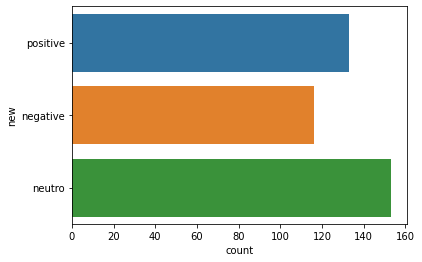

In [232]:
plt.figure()
sns.countplot(y='new', data=df_sentimentos)